In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
# MNIST dataset, reshapes the input data, scales it to values between 0 and 1
# Converts the labels into one-hot encoded categorical format.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
# Defines a Convolutional Neural Network (CNN) model for image classification
# Defines two convolutional layers, max-pooling layers and fully connected layers
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [4]:
# Configures the model for training as the evaluation metric.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
# Trains the defined model on the training data using batches of size 128 for 10 epochs, with verbose output
# Validates the model's performance on the test data (`x_test` and `y_test`).
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 22s 45ms/step - loss: 0.3112 - accuracy: 0.9049 - val_loss: 0.0622 - val_accuracy: 0.9793
Epoch 2/10
469/469 [==============================] - 21s 45ms/step - loss: 0.1003 - accuracy: 0.9698 - val_loss: 0.0458 - val_accuracy: 0.9845
Epoch 3/10
469/469 [==============================] - 27s 57ms/step - loss: 0.0732 - accuracy: 0.9784 - val_loss: 0.0342 - val_accuracy: 0.9882
Epoch 4/10
469/469 [==============================] - 39s 84ms/step - loss: 0.0600 - accuracy: 0.9816 - val_loss: 0.0329 - val_accuracy: 0.9885
Epoch 5/10
469/469 [==============================] - 52s 111ms/step - loss: 0.0536 - accuracy: 0.9841 - val_loss: 0.0300 - val_accuracy: 0.9897
Epoch 6/10
469/469 [==============================] - 53s 114ms/step - loss: 0.0426 - accuracy: 0.9877 - val_loss: 0.0259 - val_accuracy: 0.9912
Epoch 7/10
469/469 [==============================] - 49s 104ms/step - loss: 0.0400 - accuracy: 0.9881 - val_loss: 0.0246 - val_accura

In [6]:
# Evaluates the trained model's accuracy on the test data.
accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {accuracy[1]*100}%')

Test accuracy: 99.16999936103821%


In [7]:
# The code loads the MNIST dataset and assigns the training and testing data to the variables.
(trainX, trainy), (testX, testy) = mnist.load_data()

In [8]:
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


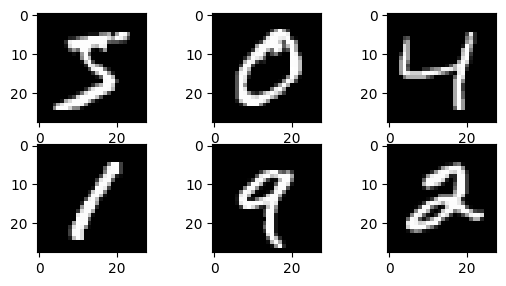

In [9]:
# Displays the first six images from the MNIST training dataset.
import matplotlib.pyplot as plt
for i in range(6):
    plt.subplot(330 + 1 + i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
plt.show()